#### LendingCulb 

1. LendingCulb은 뭐하는 곳인가요?

- 2006년 미국 샌프란시스코에서 창업한 세계 최대의 P2P(peer_to_peer) 대춢 플랫폼
- 은행을 없앤 중개소로써 돈이 필요한 개인(대출자)과 돈을 불리고싶은 기관투자자에게 직접 연결해줌

- 대출자에겐 은행보다 낮은 금리로 돈을 빌려주고 (신용카드보다)
- 투자자에겐 은행 예금보다 높은 수익률을 주는 형식

2. 돈을 어떻게 버는 기업인가?
    
    1. 대출 신청  
    2. 심사 및 등급을 산정 (여기서 분석 해야함)
    3. 투자자들을 모집 (투자자들이 사이트에 올라온 대출 리스트를 봄)
    4. 상환 및 수익 (LendingClub이 수수료를 가져감, 만약 대출자가 Chared Off하면 책임지지 않음)

3. 등급이 핵심적인 이유

- LendingClub은 온라인에만 있는 플랫폼으로 창구직원이나 지점을 내지않음
- 알고리즘(데이터)에 절대적으로 의지하는 시스템이기때문에 등급 산정이 핵심적임

#### 1. 기본 설정

- 라이브러리 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

- 데이터 프레임 불러오기 (전처리 전)

In [31]:
file_path = '../lendingClub 대출데이터셋/accepted_2007_to_2018Q4.csv'

# 필요한 컬럼만 (열= 13개)
selected_cols = [
    'loan_status',      # 타겟: 상환 여부
    'annual_inc',        # 연간 소득
    'dti',               # 총부채상환비율 (빚/소득)
    'home_ownership',    # 주거 형태 (자가, 월세 등)
    'fico_range_low',    # 신용점수 하한선
    'revol_util',        # 리볼빙 이용률
    'delinq_2yrs',       # 지난 2년간 30일 이상 연체한 횟수
    'pub_rec',           # 파산 등 공적 기록 횟수
    'loan_amnt',         # 대출 원금
    'int_rate',          # 이자율
    'term',              # 대출 기간
    'purpose',           # 대출 목적
    'grade'             # 신용 등급
]

df = pd.read_csv(file_path, usecols=selected_cols, low_memory=False)

# 행렬 개수 확인
record, columns = df.shape
print(f'행: {record}, 열: {columns}') 

행: 2260701, 열: 13


-  폰트 깨짐 방지

In [3]:
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic') 
else:
    # 리눅스
    plt.rc('font', family='NanumGothic')

# 마이너스 기호방지
plt.rcParams['axes.unicode_minus'] = False

In [21]:
df.head(3)

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,fico_range_low,pub_rec,revol_util
0,3600.0,36 months,13.99,C,MORTGAGE,55000.0,Fully Paid,debt_consolidation,5.91,0.0,675.0,0.0,29.7
1,24700.0,36 months,11.99,C,MORTGAGE,65000.0,Fully Paid,small_business,16.06,1.0,715.0,0.0,19.2
2,20000.0,60 months,10.78,B,MORTGAGE,63000.0,Fully Paid,home_improvement,10.78,0.0,695.0,0.0,56.2


In [22]:
df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,pub_rec,revol_util
count,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260639e+06,2.258866e+06
mean,1.504693e+04,1.309283e+01,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,1.975278e-01,5.033770e+01
std,9.190245e+03,4.832138e+00,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,5.705150e-01,2.471307e+01
min,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,0.000000e+00,3.150000e+01
50%,1.290000e+04,1.262000e+01,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,0.000000e+00,5.030000e+01
75%,2.000000e+04,1.599000e+01,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,0.000000e+00,6.940000e+01
max,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.600000e+01,8.923000e+02


#### 2. 파일 읽기

- 필수 컬럼들

In [ ]:
''' 'loan_status',       # 타겟: 상환 여부
    'annual_inc',        # 연간 소득
    'dti',               # 총부채상환비율 (빚/소득)
    'home_ownership',    # 주거 형태 (자가, 월세 등)
    'fico_range_low',    # 신용점수 하한선
    'revol_util',        # 리볼빙 이용률
    'delinq_2yrs',       # 지난 2년간 30일 이상 연체한 횟수
    'pub_rec',           # 파산 등 공적 기록 횟수
    'loan_amnt',         # 대출 원금
    'int_rate',          # 이자율
    'term',              # 대출 기간
    'purpose',           # 대출 목적
    'grade'              # 신용 등급
'''

In [4]:
target_status = ['Fully Paid', 'Charged Off']
df = df[df['loan_status'].isin(target_status)]

In [5]:
# mapping 
loan_status_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1
}

# 파생변수 생성 
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)
df.drop('loan_status', axis=1, inplace=True) # loan_status 삭제

# 개수 확ㄱ인
df['loan_status_binary'].value_counts()

loan_status_binary
0    1076751
1     268559
Name: count, dtype: int64

In [6]:
# 결측치 확인
df['loan_status_binary'].isnull().sum()

np.int64(0)

2. 대출자의 경제적 능력

- annual_inc : 연간 소득
-  dti : 소득 대비 부채 비율
-  emp_length : 고용기간
-  home_ownership : 주거 형태

In [23]:
df[['annual_inc', 'dti', 'home_ownership']]

,annual_inc,dti,home_ownership
0,55000.0,5.91,MORTGAGE
1,65000.0,16.06,MORTGAGE
2,63000.0,10.78,MORTGAGE
3,110000.0,17.06,MORTGAGE
4,104433.0,25.37,MORTGAGE
...,...,...,...
2260696,227000.0,12.75,MORTGAGE
2260697,110000.0,18.30,RENT
2260698,95000.0,23.36,MORTGAGE
2260699,NaN,NaN,NaN


2.  신용 기록 및 행동 패턴

-  fico_range_low / fico_range_high : 외부 신용평가기관의 점수
-  inq_last_6mths : 최근 6개월간의 신용조회 횟수
-  revol_util : 리볼빙 이용률
-  delinq_2yrs : 지난 2년간 30일 이상 연체한 횟수 
-  pub_rec : 파산 등 공적 기록 횟수

In [25]:
df[['fico_range_low', 'revol_util', 'delinq_2yrs', 'pub_rec']]

,fico_range_low,revol_util,delinq_2yrs,pub_rec
0,675.0,29.7,0.0,0.0
1,715.0,19.2,1.0,0.0
2,695.0,56.2,0.0,0.0
3,785.0,11.6,0.0,0.0
4,695.0,64.5,1.0,0.0
...,...,...,...,...
2260696,705.0,64.9,7.0,0.0
2260697,660.0,68.1,0.0,1.0
2260698,660.0,54.0,0.0,0.0
2260699,NaN,NaN,NaN,NaN


3. 대출 상품 정보

-  loan_amnt : 대출 원금
-  int_rate : 이자율
-  term : 대출 기간 (상품을 여러개로 나누기)
-  purpose : 대출 용도

In [26]:
df[['loan_amnt', 'int_rate', 'term', 'purpose']]

,loan_amnt,int_rate,term,purpose
0,3600.0,13.99,36 months,debt_consolidation
1,24700.0,11.99,36 months,small_business
2,20000.0,10.78,60 months,home_improvement
3,35000.0,14.85,60 months,debt_consolidation
4,10400.0,22.45,60 months,major_purchase
...,...,...,...,...
2260696,40000.0,10.49,60 months,debt_consolidation
2260697,24000.0,14.49,60 months,debt_consolidation
2260698,14000.0,14.49,60 months,debt_consolidation
2260699,NaN,NaN,NaN,NaN


In [27]:
df.isnull().sum()

loan_amnt           33
term                33
int_rate            33
grade               33
home_ownership      33
annual_inc          37
loan_status         33
purpose             33
dti               1744
delinq_2yrs         62
fico_range_low      33
pub_rec             62
revol_util        1835
dtype: int64

결과 

1. loan_amnt, term **(제거)**
거의 모든 필수 컬럼에 공통적으로 33개의 결측치가 있는데 이는 시스템 오류나 빈줄이라고 판단하여 제거

2. delinq_2yrs, pub_rec, inq_last_6mths **(0으로 변환)**
대략 60여개의 결측치가 있음
신용 조회나 연체기록이 NaN인 경우 시스템상 해당 사항이 없다(0건) 일 확률이 높기때문에 0으로 대체

3. dti, revol_util, annual_inc **(제거)**
각각 1744, 1835개의 결측치가 있음 (annual은 33개)
해당 컬럼들은 리스크 판단의 핵심 근거로 다른 값으로 채우기엔 위험하며 비율 역시도 굉장히 적기때문에 제거

In [33]:
# 1. 
df.dropna(subset=['loan_amnt'], inplace=True)

# 2. 
fill_zero = ['delinq_2yrs', 'pub_rec']
df[fill_zero] = df[fill_zero].fillna(0) 

# 3. 
drop_cols = ['dti', 'revol_util', 'annual_inc']
df.dropna(subset=drop_cols, inplace=True)

# 확인
print('전처리 확인')
df.isnull().sum()


전처리 확인


loan_amnt         0
term              0
int_rate          0
grade             0
home_ownership    0
annual_inc        0
loan_status       0
purpose           0
dti               0
delinq_2yrs       0
fico_range_low    0
pub_rec           0
revol_util        0
dtype: int64

- 이상치 처리

1. 100 dti(소득대비 부채비율이 100을 넘어서면 이상치)

2. 카드 사용률(사용한도)가 100을 넘으면 100으로 바꾸기

In [ ]:
# 1. dti가 100넘는 
df.loc[df['dti'] > 100, 'dti'] = 100

# 카드 사용률이 100넘으면 --> 100으로
df.loc[df['revol_util'] > 100, 'revol_util'] = 100
df

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,fico_range_low,pub_rec,revol_util,LTI,grade_num
0,3600.0,36 months,13.99,C,MORTGAGE,55000.0,Fully Paid,debt_consolidation,5.91,0.0,675.0,0.0,29.7,0.065455,3
1,24700.0,36 months,11.99,C,MORTGAGE,65000.0,Fully Paid,small_business,16.06,1.0,715.0,0.0,19.2,0.380000,3
2,20000.0,60 months,10.78,B,MORTGAGE,63000.0,Fully Paid,home_improvement,10.78,0.0,695.0,0.0,56.2,0.317460,2
3,35000.0,60 months,14.85,C,MORTGAGE,110000.0,Current,debt_consolidation,17.06,0.0,785.0,0.0,11.6,0.318182,3
4,10400.0,60 months,22.45,F,MORTGAGE,104433.0,Fully Paid,major_purchase,25.37,1.0,695.0,0.0,64.5,0.099585,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,24000.0,60 months,12.79,C,MORTGAGE,95000.0,Current,home_improvement,19.61,0.0,665.0,0.0,84.4,0.252632,3
2260695,24000.0,60 months,10.49,B,MORTGAGE,108000.0,Current,debt_consolidation,34.94,0.0,695.0,1.0,39.0,0.222222,2
2260696,40000.0,60 months,10.49,B,MORTGAGE,227000.0,Current,debt_consolidation,12.75,7.0,705.0,0.0,64.9,0.176211,2
2260697,24000.0,60 months,14.49,C,RENT,110000.0,Charged Off,debt_consolidation,18.30,0.0,660.0,1.0,68.1,0.218182,3


- 파생변수 

1. LTI : 내 연봉 대비 대출금이 얼마인가? (대출금 / 연소득)

2. 등급 수치화: A는 1등급, G는 7등급 (숫자가 클수록 위험)

In [ ]:
# 1. LTI
df['LTI'] = df['loan_amnt'] / df['annual_inc']


# 2. 등급 수치화
grade_dic = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade_num'] = df['grade'].map(grade_dic)

# 확인용
df[['dti', 'revol_util', 'LTI', 'grade_num']].describe()

,dti,revol_util,LTI,grade_num
count,2.257159e+06,2.257159e+06,2.257159e+06,2.257159e+06
mean,1.866525e+01,5.032786e+01,inf,2.663491e+00
std,9.685973e+00,2.468030e+01,NaN,1.258005e+00
min,-1.000000e+00,0.000000e+00,1.612903e-04,1.000000e+00
25%,1.190000e+01,3.150000e+01,1.250000e-01,2.000000e+00
50%,1.784000e+01,5.030000e+01,2.000000e-01,3.000000e+00
75%,2.449000e+01,6.940000e+01,2.985616e-01,3.000000e+00
max,1.000000e+02,1.000000e+02,inf,7.000000e+00


#### 3. 문제정의 (가설 검정)

1. "돈을 많이 버는 사람이 돈을 더 잘 갚을까?" (집단 간 평균 차이 검정)

- 가설($H_1$): 대출 상환 그룹(Fully Paid)과 체무 불이행 그룹(Charged Off) 간의 연소득(annual_inc) 평균에는 차이가 있다.
- 사용할 통계 기법: T-test (두 집단 간 평균 비교)분석 포인트:단순 연소득뿐만 아니라, **DTI(총부채상환비율)**도 두 그룹 간에 차이가 있는지 함께 검정하면 좋습니다.
- "분석 결과, 연소득보다는 DTI가 상환 여부에 더 큰 통계적 차이를 보였습니다." 와 같은 결론이 나오면 훌륭한 인사이트가 됩니다.

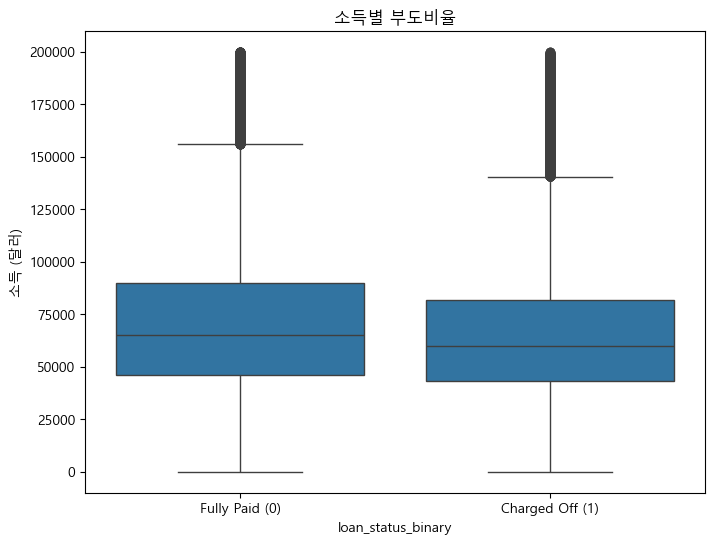

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

plt.figure(figsize=(8, 6))

sns.boxplot(x='loan_status_binary', y='annual_inc', 
            data=df[df['annual_inc'] < 200000]) # 20만개만

plt.title('소득별 부도비율')
plt.xticks([0, 1], ['Fully Paid (0)', 'Charged Off (1)'])
plt.ylabel('소득 (달러)')
plt.show()

- 통계 검정

In [ ]:
# 그룹 나누기
group_paid = df[df['loan_status_binary'] == 0]['annual_inc']
group_default = df[df['loan_status_binary'] == 1]['annual_inc']

# T-test 실행 
t_stat, p_val = stats.ttest_ind(group_paid, group_default, equal_var=False)

print(f"상환 그룹(0) 평균 소득: ${group_paid.mean():,.2f}") # 상환그룹 0
print(f"부도 그룹(1) 평균 소득: ${group_default.mean():,.2f}") # 부도그룹 1
print(f"P-value: {p_val}")

if p_val < 0.05:
    print(" 결론: 두 그룹간 소득차이는 통계적으로 의미있음 (귀무가설 기각)")
else:
    print(" 결론: 두 그룹간 소득차이는 통계적으로 의미있음 (귀무가설 채택)")

상환 그룹(0) 평균 소득: $77,705.95
부도 그룹(1) 평균 소득: $70,400.74
P-value: 0.0
>> 결론: 두 그룹간 소득차이는 통계적으로 의미있음 (귀무가설 기각)


- 결과 

중앙값(박스 가운데 선): 상환 완료 그룹이 부도 그룹보다 더 높다.

결론: "소득이 높을수록 대출 상환 확률이 높다"는 가설은 입증

2. "집이 없는 사람이 대출을 더 자주 떼어먹을까?" (범주형 변수 간 독립성 검정)

- 가설(h1): 
주거 형태(Home Ownership)와 대출 상환 여부(Loan Status)는 서로 독립적이지 않다(관련이 있다).

- 사용할 통계 기법: 카이제곱 검정 (Chi-square Test)

- 분석 포인트: 
MORTGAGE(담보대출 있음) vs RENT(월세) 그룹 중 어디가 더 연체율이 높은지 통계적으로 검증
이를 통해 "월세 거주자에게는 대출 심사 기준을 강화해야 한다"는 비즈니스 액션 플랜을 도출할 수 있다.

home_ownership
RENT        0.232150
OWN         0.206120
ANY         0.196491
OTHER       0.190141
MORTGAGE    0.172090
NONE        0.145833
Name: loan_status_binary, dtype: float64


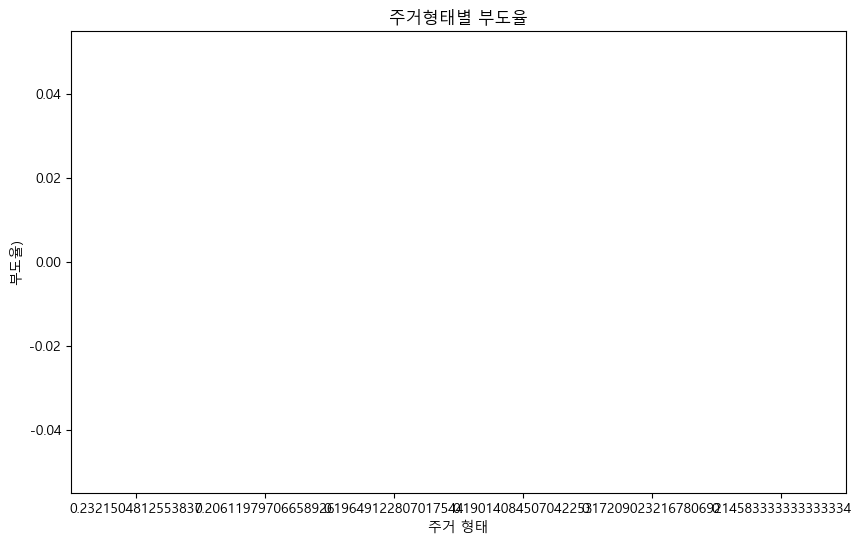

In [10]:
own_risk = df.groupby('home_ownership')['loan_status_binary'].mean().sort_values(ascending=False)

print(own_risk)

plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='loan_status_binary', data=df, errorbar=None, order=own_risk)

plt.title('주거형태별 부도율')
plt.ylabel('부도율)')
plt.xlabel('주거 형태')
plt.show()

- 통계 검정 (카이제곱)

In [11]:
# 교차표 생성 --> 주거형태별 있으면 1 없으면 0
contingency_table = pd.crosstab(df['home_ownership'], df['loan_status_binary'])

# 카이제곱 실행
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"=== 카이제곱 검정 결과 ===")
print(f"P-value: {p_val}")

if p_val < 0.05: # p_value if
    print(">> 결론: 주거 형태와 부도 여부는 상관관계가 있다")
else:
    print(">> 결론: 주거 형태는 부도와 관련이 없다")

NameError: name 'stats' is not defined

3. "신용 등급은 공정하게 매겨졌을까?" (상관분석 및 분산분석)

- 가설(H1): 신용 등급(Grade)에 따라 대출 이자율(Int_rate)의 평균은 통계적으로 유의미한 차이가 있다.

- 사용할 통계 기법: ANOVA (일원배치 분산분석)

- 분석 포인트:
A등급과 B등급, B등급과 C등급 간에 확실한 금리 차이가 존재하는지 확인(사후 검정).

더 나아가, "이자율을 결정하는 가장 큰 요인은 무엇인가?" 를 주제로 다중 선형 회귀분석(Multiple Linear Regression)까지 확장하면 더 깊게 할수 있어보임

In [ ]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# 2. 등급별 부도율 계산
grade_risk = df.groupby('grade')['loan_status_binary'].mean().reindex(grade_order)

print(grade_risk)

# 3. (왼쪽: 부도율, 오른쪽: 등급별 이자율 분포)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 등급별 부도율 
sns.barplot(x=grade_risk.index, y=grade_risk.values, palette='RdYlGn_r', ax=ax[0])
ax[0].set_title('Default Rate by Grade (Risk Factor)')
ax[0].set_ylabel('Default Rate')
ax[0].set_xlabel('Credit Grade')

# 등급별 이자율
# 등급이 나쁜데 이자율이 낮거나, 등급이 좋은데 이자율이 높으면 시스템 문제임
sns.boxplot(x='grade', y='int_rate', data=df, order=grade_order, palette='RdYlGn_r', ax=ax[1])
ax[1].set_title('Interest Rate Distribution by Grade')
ax[1].set_ylabel('Interest Rate (%)')
ax[1].set_xlabel('Credit Grade')

plt.tight_layout()
plt.show()

##### 등급별 연체율 계산

- 결과 등급이 내려갈수록 이자율이 완만하게 올라가는 그래프 (크게 잘못되지않음)
- C 등급을 기점으로 5명 중 1명이 연체하여 리스크가 상승함
- G 등급은 거진 절반 이상이 채무불이행

In [ ]:
summary_list = []

#---------------------------------------------------------------------------------------------------

for chunk in df:
    target_df = chunk[chunk['loan_status'].isin(['Fully Paid', 'Charged Off'])] # 두 값만남김

    # 등급별 연체 개수
    counts = target_df.groupby(['grade', 'loan_status']).size()
    summary_list.append(counts)

# [grade , loan_status] 기준으로 concat.unstact()
final_df = pd.concat(summary_list).groupby(level=[0,1]).sum().unstack()

# 연체율 공식(파생변수) = 부실 / (정상+ 부실) *100
final_df['defalut_rate'] = final_df['Charged Off'] / (final_df['Fully Paid'] + final_df['Charged Off']) * 100


print('---등급별 상각처리(미납), 완납, 이자율---')
final_df

##### 가설 1. B등급과 C등급 사이의 '경계선 대출자'

B등급의 연체율(13.4%)과 C등급(22.4%)은 차이가 크다

B등급 중에서도 특정 조건(예: DTI가 높거나 신용조회 횟수가 많음) 등등

사람들은 이미 C등급 수준의 연체율을 보이고 있지 않을까? 이들을 조기에 찾아내서 등급을 낮춰야함

- dti (소득 대비 부채 비율)

In [ ]:
import warnings

warnings.filterwarnings('ignore')

summary_list =[]

####---------------------------------------------------------------------------------------------

for chunk in ChunkB:
    target_df = chunk[chunk['loan _status'].isin(['Fully Paid', 'Charged Off'])].copy()

    # Dti 구간 bin으로 나눈기 (0~30+)
    target_df['dti_bin'] = pd.cut(target_df['dti'],
                                  bins = [0, 10 , 20 , 30 , 100],
                                  labels = ['0~10', '10~20', '20~30', '30+'])
    
    # 등급 X dit(bin) 별로 개수 세기
    counts = target_df.groupby(['grade', 'dti_bin', 'loan_status']).size()
    summary_list.append(counts)

# 위 세가지 컬럼기준으로 합침 (unstack 활용)
final_df = pd.concat(summary_list).groupby(level=[0,1,2]).sum().unstack()

# 다시 연체율 공식(파생변수) = 부실 / (정상+ 부실) *100
final_df['defalut_rate'] = final_df['Charged Off'] / (final_df['Fully Paid'] + final_df['Charged Off']) * 100

# 인덱스는 grade 기준 --> (level=1)
result = final_df['defalut_rate'].unstack(level=1)

print('--- (등급 X dti) 별 연체율 ---')
result

--- 등급별 / dti ---


dti_bin,0~10,10~20,20~30,30+
grade,,,,
A,4.876456,5.677941,7.596951,8.651832
B,11.319226,12.726188,15.223469,15.928963
C,19.026920,21.030581,24.754232,25.964483
D,25.345879,28.404115,32.423586,35.445603
E,30.741381,35.765874,40.884510,45.241829
F,36.864620,41.892739,47.152202,54.181346
G,44.512730,46.279373,51.334765,57.920489


결과 

1. A 등급에선 구간(BIN)별 연체율이 최소 4% ~ 최대8%로 4% 정도밖에 차이나지않음
2. 대체적으로 상위 등급(grade)의 dti 별 최대 연체율은 하위 등급의 dti별 최하 연체율과 비슷했다 (역시 크게 문제되지않음)

##### 가설 2. 저등급(E~G) 내에서의 저평가 대출자

G등급은 연체율이 50%지만, 반대로 말하면 50%는 돈을 갚았다.

똑같은 G등급인데 누구는 갚고 누구는 못 갚았을까?

그 차이를 찾아내서 저신용 고금리 대출자한테 높은 이윤을 찾아보기